In [ ]:
#Harshvardhan Aditya
#E20CSE365
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving mushrom.txt to mushrom.txt


In [ ]:
import io
mushroom_df=pd.read_csv(io.BytesIO(uploaded['mushrom.txt']),delim_whitespace=True,names=["Column "+str(i) for i in range(1,22)])
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Column 1   8124 non-null   int64
 1   Column 2   8124 non-null   int64
 2   Column 3   8124 non-null   int64
 3   Column 4   8124 non-null   int64
 4   Column 5   8124 non-null   int64
 5   Column 6   8124 non-null   int64
 6   Column 7   8124 non-null   int64
 7   Column 8   8124 non-null   int64
 8   Column 9   8124 non-null   int64
 9   Column 10  8124 non-null   int64
 10  Column 11  8124 non-null   int64
 11  Column 12  8124 non-null   int64
 12  Column 13  8124 non-null   int64
 13  Column 14  8124 non-null   int64
 14  Column 15  8124 non-null   int64
 15  Column 16  8124 non-null   int64
 16  Column 17  8124 non-null   int64
 17  Column 18  8124 non-null   int64
 18  Column 19  8124 non-null   int64
 19  Column 20  8124 non-null   int64
 20  Column 21  8124 non-null   int64
dtypes: int64(21)
m

In [ ]:
mushroom_df.dropna(axis=0,inplace=True)
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8124 entries, 0 to 8123
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Column 1   8124 non-null   int64
 1   Column 2   8124 non-null   int64
 2   Column 3   8124 non-null   int64
 3   Column 4   8124 non-null   int64
 4   Column 5   8124 non-null   int64
 5   Column 6   8124 non-null   int64
 6   Column 7   8124 non-null   int64
 7   Column 8   8124 non-null   int64
 8   Column 9   8124 non-null   int64
 9   Column 10  8124 non-null   int64
 10  Column 11  8124 non-null   int64
 11  Column 12  8124 non-null   int64
 12  Column 13  8124 non-null   int64
 13  Column 14  8124 non-null   int64
 14  Column 15  8124 non-null   int64
 15  Column 16  8124 non-null   int64
 16  Column 17  8124 non-null   int64
 17  Column 18  8124 non-null   int64
 18  Column 19  8124 non-null   int64
 19  Column 20  8124 non-null   int64
 20  Column 21  8124 non-null   int64
dtypes: int64(21)
m

In [ ]:
numeric_cols=[cols for cols in mushroom_df.columns if mushroom_df[cols].dtype in ['int64','float64']]

In [ ]:
for i in numeric_cols:
  print(i,'mean=',mushroom_df[i].mean())

Column 1 mean= 2.637616937469227
Column 2 mean= 1.9719350073855244
Column 3 mean= 3.0940423436730673
Column 4 mean= 1.5844411619891678
Column 5 mean= 5.045790251107829
Column 6 mean= 1.0258493353028064
Column 7 mean= 1.1614967996061054
Column 8 mean= 1.3092072870507139
Column 9 mean= 5.109798129000493
Column 10 mean= 1.5672082717872968
Column 11 mean= 2.2299359921221074
Column 12 mean= 1.9945839487936976
Column 13 mean= 2.149679960610537
Column 14 mean= 2.2210733628754307
Column 15 mean= 1.0492368291482028
Column 16 mean= 1.1521418020679468
Column 17 mean= 1.6962087641555883
Column 18 mean= 2.7031019202363367
Column 19 mean= 3.689807976366322
Column 20 mean= 4.041358936484491
Column 21 mean= -0.035942885278188084


In [ ]:
for i in numeric_cols:
  print(i,'median=',mushroom_df[i].median())

Column 1 median= 2.0
Column 2 median= 2.0
Column 3 median= 3.0
Column 4 median= 2.0
Column 5 median= 4.0
Column 6 median= 1.0
Column 7 median= 1.0
Column 8 median= 1.0
Column 9 median= 5.0
Column 10 median= 2.0
Column 11 median= 2.0
Column 12 median= 1.0
Column 13 median= 1.0
Column 14 median= 1.0
Column 15 median= 1.0
Column 16 median= 1.0
Column 17 median= 2.0
Column 18 median= 3.0
Column 19 median= 4.0
Column 20 median= 5.0
Column 21 median= -1.0


In [ ]:
for i in numeric_cols:
  print(i,'variance=',mushroom_df[i].var())

Column 1 variance= 2.5248238660480946
Column 2 variance= 0.6014528107452697
Column 3 variance= 3.0683431797899243
Column 4 variance= 0.24289958917579518
Column 5 variance= 3.838356029371457
Column 6 variance= 0.0251842471483944
Column 7 variance= 0.135432253959985
Column 8 variance= 0.21362443616011675
Column 9 variance= 5.601632410308014
Column 10 variance= 0.24551326894055336
Column 11 variance= 0.3189067544892226
Column 12 variance= 1.7771465830046633
Column 13 variance= 2.4446619682256263
Column 14 variance= 2.8323220780838936
Column 15 variance= 0.11969780479388273
Column 16 variance= 0.27673922598103995
Column 17 variance= 0.6192592921255379
Column 18 variance= 1.9490190608899067
Column 19 variance= 1.9030304198499264
Column 20 variance= 2.9036197706932034
Column 21 variance= 0.9988310571831492


In [ ]:
for i in numeric_cols:
  print(i,'standard deviation=',mushroom_df[i].std())

Column 1 standard deviation= 1.5889694352151946
Column 2 standard deviation= 0.7755338875544187
Column 3 standard deviation= 1.7516686843664027
Column 4 standard deviation= 0.4928484444287059
Column 5 standard deviation= 1.9591722816974155
Column 6 standard deviation= 0.15869545408862348
Column 7 standard deviation= 0.36801121444867
Column 8 standard deviation= 0.4621952359773051
Column 9 standard deviation= 2.3667767977373813
Column 10 standard deviation= 0.49549295549034134
Column 11 standard deviation= 0.564718296577349
Column 12 standard deviation= 1.333096614279949
Column 13 standard deviation= 1.5635414827325902
Column 14 standard deviation= 1.682950408682292
Column 15 standard deviation= 0.3459737053503961
Column 16 standard deviation= 0.5260600973092713
Column 17 standard deviation= 0.7869302968659536
Column 18 standard deviation= 1.396072727650643
Column 19 standard deviation= 1.3795036860588399
Column 20 standard deviation= 1.7040011064237028
Column 21 standard deviation= 0.9

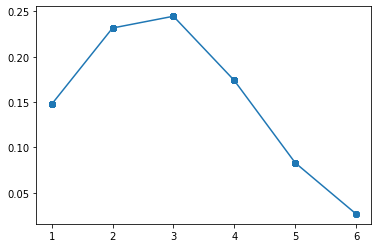

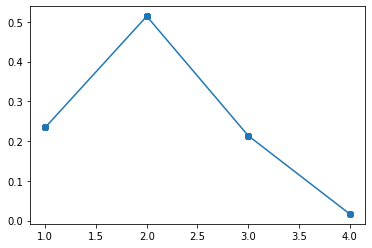

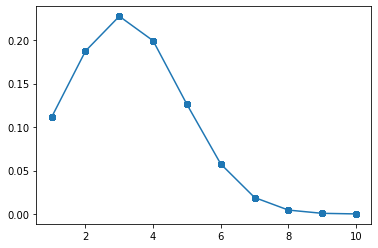

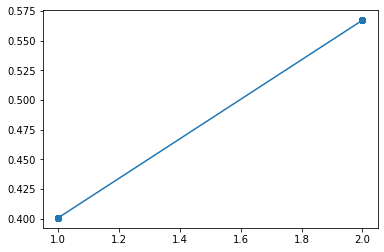

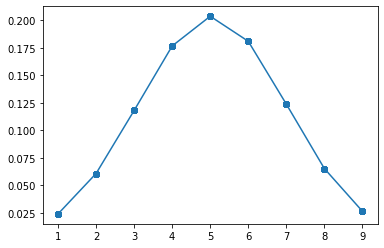

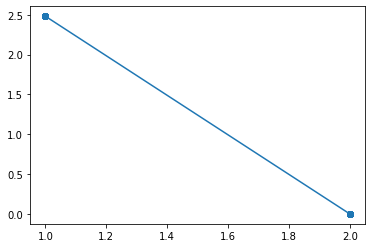

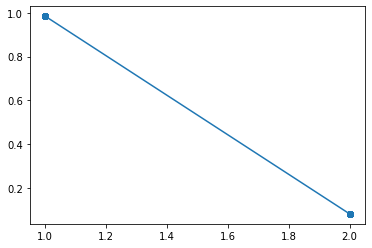

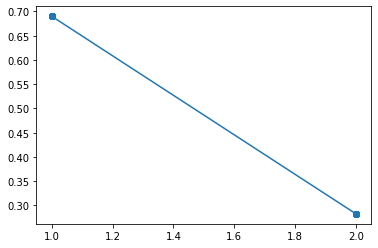

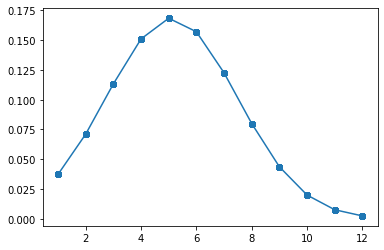

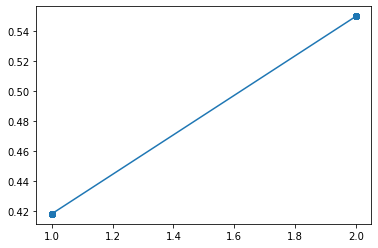

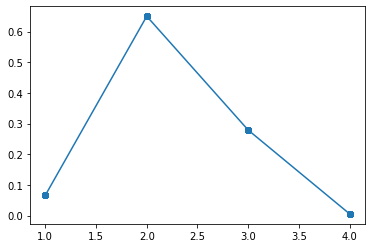

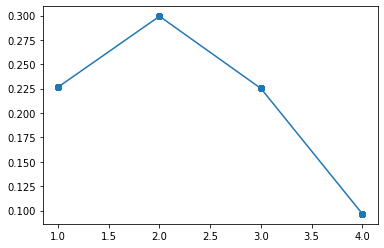

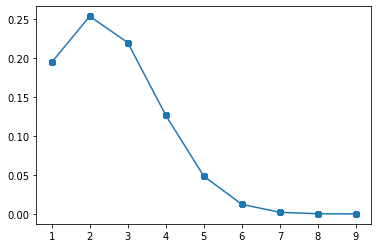

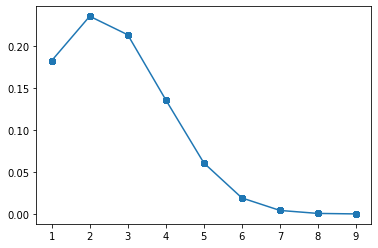

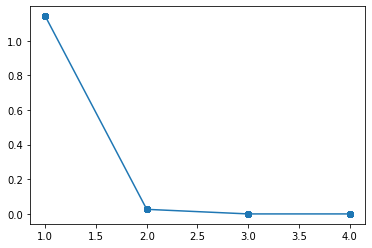

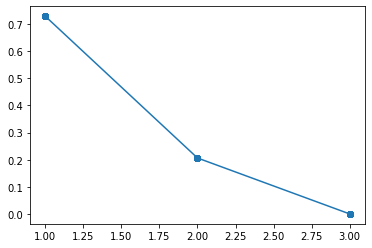

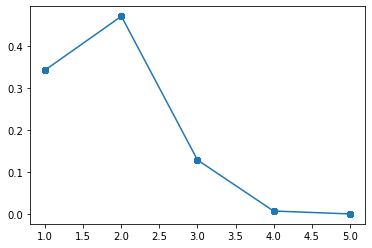

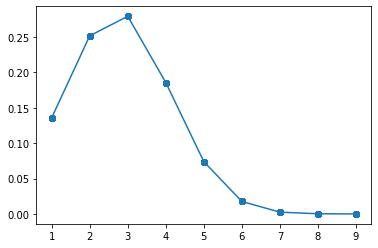

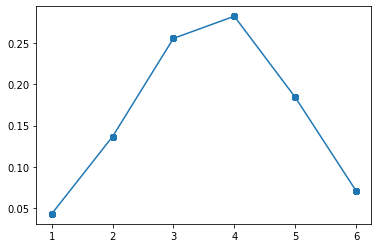

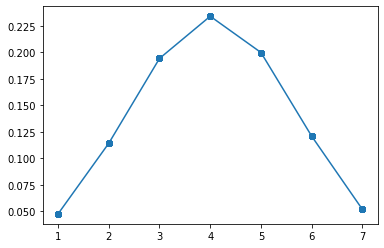

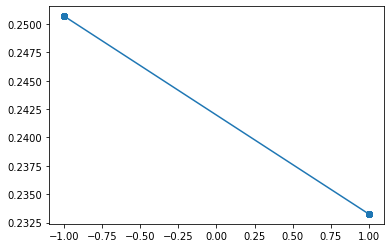

In [ ]:
from scipy.stats import norm
import pylab as pl
for i in numeric_cols:
  # plt.plot(artificial_df[i],norm.pdf(artificial_df[i],artificial_df[i].mean(),artificial_df[i].std()))
  # plt.show()
  h=sorted(mushroom_df[i])
  pl.plot(h,norm.pdf(h,mushroom_df[i].mean(),mushroom_df[i].std()),'-o')
  pl.show()
  # print(i,'Normal Distribution=',norm.pdf(mushroom_df[i],mushroom_df[i].mean(),mushroom_df[i].std()))

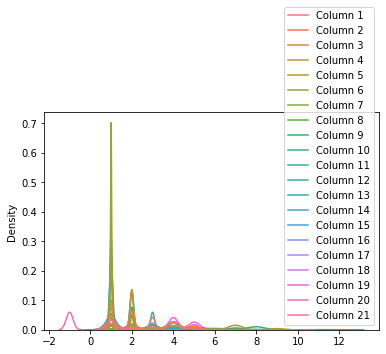

In [ ]:
ax = sns.kdeplot(data= mushroom_df)

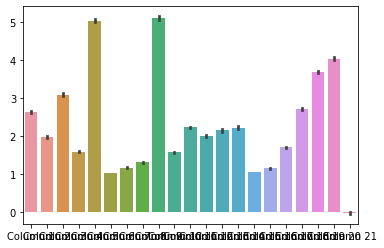

In [ ]:
ax = sns.barplot(data= mushroom_df)

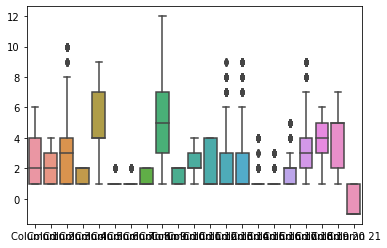

In [ ]:
ax = sns.boxplot(data=mushroom_df)

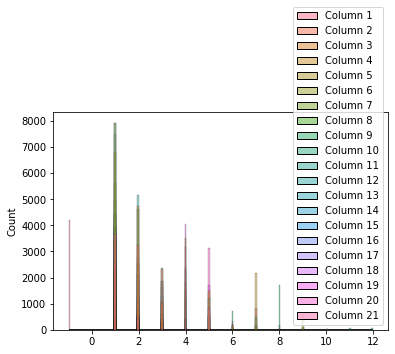

In [ ]:
ax = sns.histplot(data= mushroom_df)

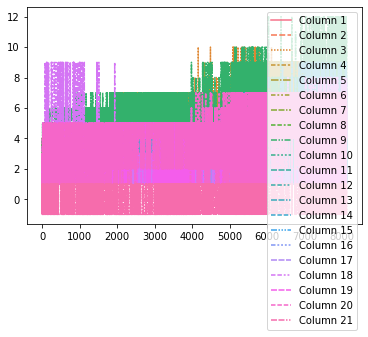

In [ ]:
ax = sns.lineplot(data= mushroom_df)

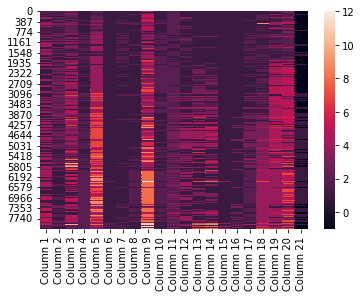

In [ ]:
ax = sns.heatmap(mushroom_df)

In [ ]:
int_cols=[cols for cols in mushroom_df.columns if mushroom_df[cols].dtype in ['int64']]
mushroom_df.info()
for i in int_cols:
  mushroom_df[i]=mushroom_df[i].astype(float)
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8124 entries, 0 to 8123
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Column 1   8124 non-null   int64
 1   Column 2   8124 non-null   int64
 2   Column 3   8124 non-null   int64
 3   Column 4   8124 non-null   int64
 4   Column 5   8124 non-null   int64
 5   Column 6   8124 non-null   int64
 6   Column 7   8124 non-null   int64
 7   Column 8   8124 non-null   int64
 8   Column 9   8124 non-null   int64
 9   Column 10  8124 non-null   int64
 10  Column 11  8124 non-null   int64
 11  Column 12  8124 non-null   int64
 12  Column 13  8124 non-null   int64
 13  Column 14  8124 non-null   int64
 14  Column 15  8124 non-null   int64
 15  Column 16  8124 non-null   int64
 16  Column 17  8124 non-null   int64
 17  Column 18  8124 non-null   int64
 18  Column 19  8124 non-null   int64
 19  Column 20  8124 non-null   int64
 20  Column 21  8124 non-null   int64
dtypes: int64(21)
m